## Frecuencias y filtros a ruido blanco

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import deltasigma as ds

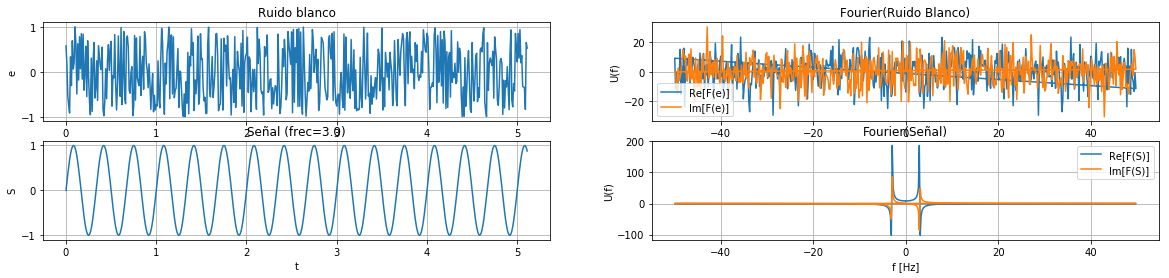

In [2]:
f_sampling = 100 # cantidad de sampleos por unidad de tiempo
f_bandwidth = 5 # frecuencia máxima de la señal de entrada (NO LA USAMOS TODAVIA)
T_sampling = 1/f_sampling # tiempo entre sampleos
N = 512 # cantidad total de sampleos
T = N*T_sampling # tiempo total
OSR = f_sampling/(2*f_bandwidth)

f_test = 3 # frecuencia de la señal de entrada, debe ser menor a f_bandwidth
phi_test = 0 # fase angular inicial

t = np.arange(N)*T_sampling
e = np.random.uniform(-1,1,size=(N,)) # ruido blanco
signal = np.sin(2*np.pi*f_test*t + phi_test) # señal

ds.figureMagic(size=(20,4))

plt.subplot(2,2,1)
plt.plot(t,e,'-')
plt.title('Ruido blanco')
plt.xlabel('t')
plt.ylabel('e')
plt.grid(True)

plt.subplot(2,2,2)
U = np.fft.fft(e)
freq = np.fft.fftfreq(t.shape[-1],d=T_sampling)
plt.plot(freq, U.real,label='Re[F(e)]')
plt.plot(freq, U.imag,label='Im[F(e)]')
plt.grid(True)
plt.title('Fourier(Ruido Blanco)')
plt.xlabel('f [Hz]')
plt.ylabel('U(f)')
plt.legend()

plt.subplot(2,2,3)
plt.plot(t,signal,'-')
plt.title('Señal (frec=%.1f)' % f_test)
plt.xlabel('t')
plt.ylabel('S')
plt.grid(True)

plt.subplot(2,2,4)
U = np.fft.fft(signal)
freq = np.fft.fftfreq(t.shape[-1],d=T_sampling)
plt.plot(freq, U.real,label='Re[F(S)]')
plt.plot(freq, U.imag,label='Im[F(S)]')
plt.grid(True)
plt.title('Fourier(Señal)')
plt.xlabel('f [Hz]')
plt.ylabel('U(f)')
plt.legend()

#plt.plot()

La línea que atraviesa ambos gráficos es porque el array freq tiene la forma [0,1,2,...,n,-n,-n+1,-n+1,...,-1] (después la sacamos...)

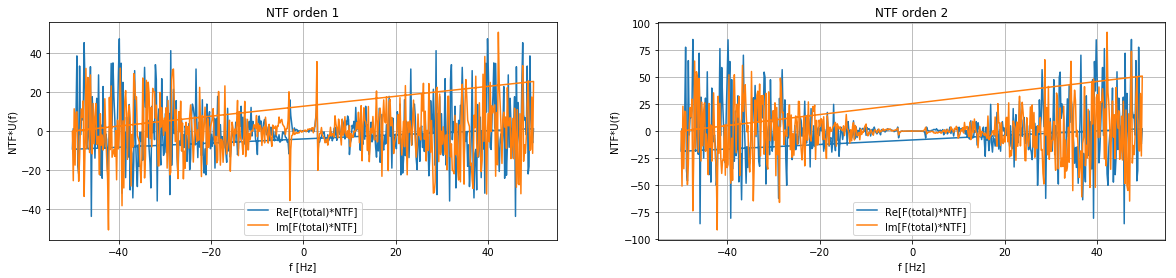

In [3]:
def NTF(f,L):
    z = np.exp(2j*np.pi*f*T_sampling)
    return (1-1/z)**L

ds.figureMagic(size=(20,4))

total = e + signal # para volver a lo de antes, redefinir 'total= e'
# total = e

plt.subplot(1,2,1)
U = np.fft.fft(total)
freq = np.fft.fftfreq(t.shape[-1],d=T_sampling)
ntf = NTF(freq,1)
V = np.multiply(U,ntf)
plt.plot(freq, V.real,label='Re[F(total)*NTF]')
plt.plot(freq, V.imag,label='Im[F(total)*NTF]')
plt.grid(True)
plt.title('NTF orden 1')
plt.xlabel('f [Hz]')
plt.ylabel('NTF*U(f)')
plt.legend()

plt.subplot(1,2,2)
U = np.fft.fft(total)
freq = np.fft.fftfreq(t.shape[-1],d=T_sampling)
ntf = NTF(freq,2)
V = np.multiply(U,ntf)
plt.plot(freq, V.real,label='Re[F(total)*NTF]')
plt.plot(freq, V.imag,label='Im[F(total)*NTF]')
plt.grid(True)
plt.title('NTF orden 2')
plt.xlabel('f [Hz]')
plt.ylabel('NTF*U(f)')
plt.legend()


Los valores negativos no importan porque deben ser por la fase. El valor absoluto es muy bajo a frecuencias bajas y alto a frecuencias altas (el filtro pasaaltos que esperábamos)

### Escala log y quedandonos con frecuencias positivas y valores absolutos:

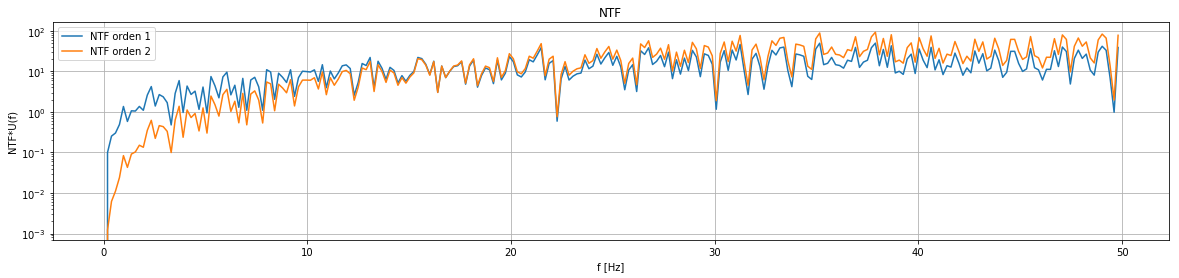

In [6]:
ds.figureMagic(size=(20,4))


U = np.fft.fft(e)
freq = np.fft.fftfreq(t.shape[-1],d=T_sampling)
U = U[:N//2]
freq = freq[:N//2] # frecuencias positivas
ntf = NTF(freq,1)
V = np.multiply(U,ntf)
V = np.sqrt(V.real**2+V.imag**2) # valores absolutos
plt.plot(freq, V,label='NTF orden 1')
plt.grid(True)
plt.title('NTF orden 1')
plt.xlabel('f [Hz]')
plt.ylabel('NTF*U(f)')
plt.legend()


U = np.fft.fft(e)
freq = np.fft.fftfreq(t.shape[-1],d=T_sampling)
U = U[:N//2]
freq = freq[:N//2]
ntf = NTF(freq,2)
V = np.multiply(U,ntf)
V = np.sqrt(V.real**2+V.imag**2)
plt.plot(freq, V,label='NTF orden 2')


plt.grid(True)
plt.title('NTF')
plt.xlabel('f [Hz]')
plt.ylabel('NTF*U(f)')
plt.legend()

plt.yscale("log")